In [1]:
def AverageUnc(Up,Down):
    Average = (Up + Down)/2
    # mask = Average < percentage
    return Average 

#simplified form of stephan boltzman law
def Luminosity(Rad, Temp):
    return (Rad)**2 * (Temp)**4 #  Solar Units

def Lum_err(Rad,D_Rad,Temp,D_Temp):
    return Luminosity(Rad,Temp) * np.sqrt((D_Rad/Rad)**2 + (D_Temp/Temp)**2)

def Insol(Lum,a):
    return (Lum) * (1/a)**2 # Earth units

def Insol_err(Lum, D_lum, a, D_a):
    return Insol(Lum,a) * np.sqrt((D_lum/Lum)**2 + (D_a/a)**2)

In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, matplotlib.colors as mcolors
# from pyplot import figure

dtype_spec = {
    'column_name_4': 'str',
    'column_name_5': 'float'
}

Data = pd.read_csv("New_Stellar_host_mod.csv",dtype=dtype_spec, low_memory=False)
Dat= Data.drop_duplicates(subset="pl_name", keep="first").dropna(how='all').reset_index(drop=True)

radius = Dat["pl_radj"]
rad_err = [Dat["pl_radjerr1"], Dat["pl_radjerr2"]]
mass = Dat["pl_bmassj"]
mass_err = [Dat["pl_bmassjerr1"], Dat["pl_bmassjerr2"]]
mass_stellar = Dat["st_mass"]
rad_stellar = Dat["st_rad"]
Temp = Dat["st_teff"]
Temp_err =  [Dat["st_tefferr1"], Dat["st_tefferr2"]]
a = Dat["pl_orbsmax"]
Stellar_lum = Luminosity(rad_stellar/1,Temp/5777)
insol = Insol(Stellar_lum,a)

radii_uncertainty = (((rad_err[0]+rad_err[1]))/2)/radius *100
mass_uncertainty = (((mass_err[0]+mass_err[1])/2))/mass *100

mask = (radii_uncertainty < 10) & (mass_uncertainty < 20) & np.isfinite(insol)

Dat = Dat[mask].dropna(how='all').reset_index(drop=True)
radius_filtered = Dat["pl_radj"]
rad_err_filtered = [Dat["pl_radjerr1"], Dat["pl_radjerr2"]]
mass_filtered = Dat["pl_bmassj"]
mass_err_filtered = [Dat["pl_bmassjerr1"], Dat["pl_bmassjerr2"]]
mass_stellar_filtered = Dat["st_mass"]
rad_stellar_filtered = Dat["st_rad"]
Temp_filtered = Dat["st_teff"]
Temp_err_filtered =  [Dat["st_tefferr1"], Dat["st_tefferr2"]]
a_filtered = Dat["pl_orbsmax"]
a_err_filtered = [Dat["pl_orbsmaxerr1"],Dat["pl_orbsmaxerr2"]]

Stellar_lum = Luminosity(rad_stellar_filtered/1,Temp_filtered/5777)
Stellar_Lum_err = Lum_err(radius_filtered,(rad_err_filtered[0]+np.abs(rad_err_filtered[1]))/2,Temp_filtered/5777,((Temp_err_filtered[0]+np.abs(Temp_err_filtered[1]))/2)/5777)
insol = Insol(Stellar_lum,a_filtered)
insol_err = Insol_err(Stellar_lum,Stellar_Lum_err,a_filtered,(a_err_filtered[0]+np.abs(a_err_filtered[1]))/2)

In [3]:
from IPython.display import display, Math

Lum = Luminosity(5.6323/1, 4725.29/5777)
Lumerr = Lum_err(5.6323/1, 0.0809/1,4725.29/5777,100/5777)
display(Math(r'L_* = ({0:.3f} \pm {1:.3f}) L_{2}'.format(Lum, Lumerr,'{\odot}')))
Insol_b = Insol(Lum,0.25469955)
Insol_b_err = Insol_err(Lum,Lumerr,0.25469955,0.0033)
display(Math(r'F_b = ({0:.3f} \pm {1:.3f}) F_{2}'.format(Insol_b, Insol_b_err,'{\oplus}')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/tmp/ipykernel_1812/1050843591.py:34: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(mass_filtered,radius_filtered, xerr = np.abs(mass_err_filtered),yerr = np.abs(rad_err_filtered),fmt='-',capsize=3,linestyle='',c='grey',zorder=-100)
/tmp/ipykernel_1812/1050843591.py:48: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(insol,radius_filtered,xerr=np.abs(insol_err),yerr = np.abs(rad_err_filtered),fmt='-',capsize=3,linestyle='',c='grey',zorder=-100)
/tmp/ipykernel_1812/1050843591.py:73: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(insol,radius_filtered,xerr=np.abs(insol_err),yerr = np.abs(ra

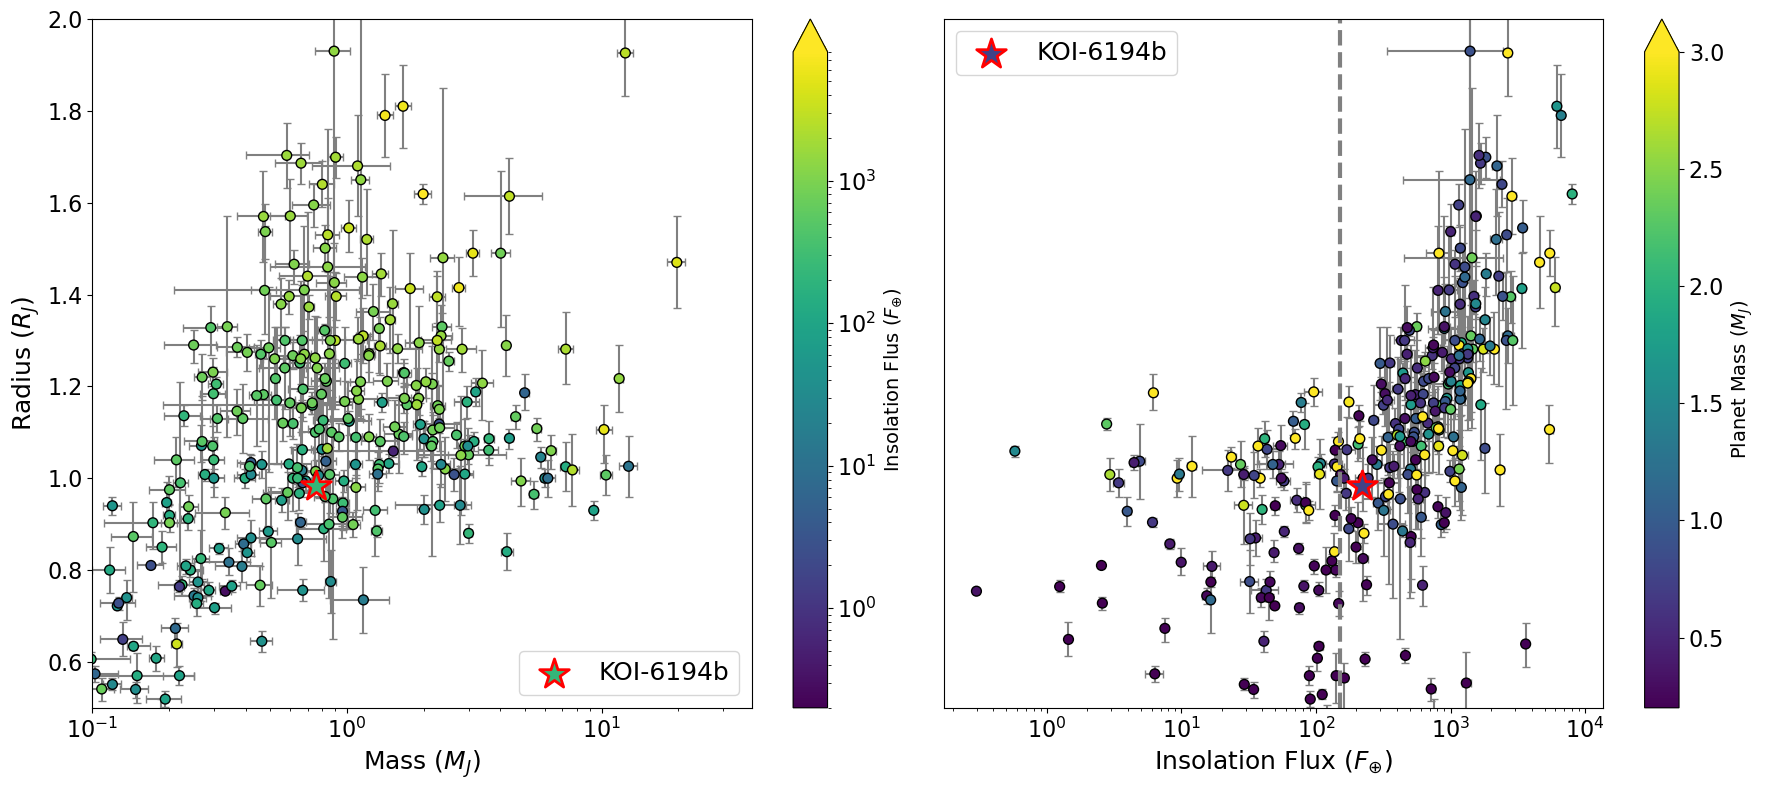

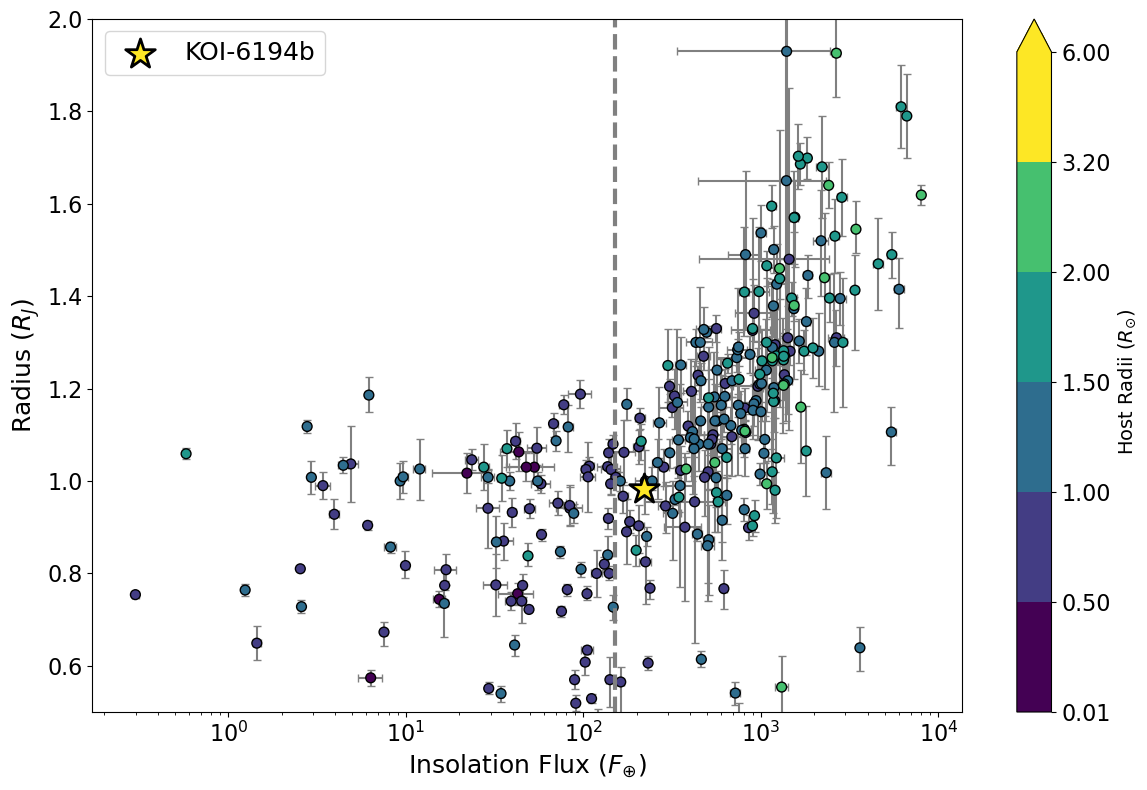

In [4]:
from matplotlib.patheffects import Normal
from numpy import NaN
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as clr
from matplotlib.colors import BoundaryNorm, ListedColormap, LogNorm, Normalize, LinearSegmentedColormap, PowerNorm

%matplotlib inline
# [r,m,ecc,p,insol, teff, lambda]
KOI6194b = [9.829/10, 240.1628/317.93842034806,  0.1574, 42.2958,Insol_b,4725.29, 0]
KOI_rad = 5.632

cmap = mpl.cm.viridis

def Plotting(x_val, y_val,KOI_valx, KOI_valy,colourbar,norm,star_mass,S,edgecolor,xtitle = "",ytitle="",logx=True,logy=True):
    scatter = ax.scatter(x_val, y_val, c=colourbar, cmap=cmap, s=S, norm=norm, edgecolor='k')
    ax.scatter(KOI6194b[KOI_valx],KOI6194b[KOI_valy],c=star_mass,cmap=scatter.cmap,norm=scatter.norm,marker='*',
                            edgecolor=edgecolor,linewidth=2,s=500,label='KOI-6194b')
    ax.legend(fontsize=18)

    if logy==True:
        ax.set_yscale('log')
    if logx==True:
        ax.set_xscale('log')
    ax.set_xlabel(xtitle,fontsize=18)
    ax.set_ylabel(ytitle,fontsize=18)
    return scatter

figure, axes = plt.subplots(1,2,figsize=(18,8))

ax = axes[0]
norm = LogNorm(vmin=0.2, vmax=max(insol))
sc = Plotting(mass_filtered,radius_filtered,1,0,insol,norm,Insol_b,50,'r',r'Mass ($M_J$)',r'Radius ($R_J$)',True,False)
ax.errorbar(mass_filtered,radius_filtered, xerr = np.abs(mass_err_filtered),yerr = np.abs(rad_err_filtered),fmt='-',capsize=3,linestyle='',c='grey',zorder=-100)
# ax.errorbar(KOI6194b[2],KOI6194b[0],yerr = 0.15/317,linestyle='',c='b',linewidth=2,zorder=-100)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0.5,2.0)
ax.set_xlim(0.1,)
cbar = figure.colorbar(sc,ax=ax,extend='max')
cbar.set_label(r'Insolation Flus $(F_{\oplus})$',fontsize=14)
cbar.ax.tick_params(labelsize=16)

ax = axes[1]
norm = Normalize(vmin=0.2, vmax=3)
sc1 = Plotting(insol,radius_filtered,4,0,mass_filtered,norm,KOI6194b[1],50,'r',r'Insolation Flux ($F_{\oplus}$)','',True,False)
# Plotting(insol_filtered,radius_filtered,4,0,rad_stellar_filtered,KOI_rad,50,r'Insolation Flux ($F_{\oplus}$)',r'Radius ($R_J$)',True,False)

ax.errorbar(insol,radius_filtered,xerr=np.abs(insol_err),yerr = np.abs(rad_err_filtered),fmt='-',capsize=3,linestyle='',c='grey',zorder=-100)
# ax.errorbar(KOI6194b[4],KOI6194b[0],yerr = 0.15/317,linestyle='',c='b',linewidth=2,zorder=-100)
ax.axvline(150,c='grey',linestyle='--',linewidth=3.0)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0.5,2.0)
ax.set_yticks([])
cbar1 = figure.colorbar(sc1,ax=ax,extend='max')
cbar1.set_label(r'Planet Mass $(M_J)$',fontsize=14)
cbar1.ax.tick_params(labelsize=16)
plt.tight_layout()
figure.savefig("Mass_Radius_relations.png",facecolor='w',dpi=100,bbox_inches='tight')

fig_bragging_rights, ax_bragg = plt.subplots(1,figsize=(12,8))
ax = ax_bragg
colors = plt.get_cmap('viridis')(np.linspace(0, 1, 256))
new_colors = np.vstack((colors[:200], colors[230:]))  # Remove colors between indices that map to [3.2, 6.0]
new_cmap = ListedColormap(new_colors)
cmap = new_cmap
bounds = [0.01, 0.5, 1, 1.5, 2, 3.2, 6]
norm = BoundaryNorm(bounds, ncolors=cmap.N, clip=True)

# norm = Normalize(vmin=0.01, vmax=6.0)
sc2 = Plotting(insol,radius_filtered,4,0,rad_stellar_filtered,norm,KOI_rad,50,'k',r'Insolation Flux ($F_{\oplus}$)',r'Radius ($R_J$)',True,False)
# Plotting(insol_filtered,radius_filtered,4,0,rad_stellar_filtered,KOI_rad,50,r'Insolation Flux ($F_{\oplus}$)','',True,False)
# errors_radinsol = np.abs([(rad_err[0])[mask],(rad_err[1])[mask]])
ax.errorbar(insol,radius_filtered,xerr=np.abs(insol_err),yerr = np.abs(rad_err_filtered),fmt='-',capsize=3,linestyle='',c='grey',zorder=-100)
# ax.errorbar(insol_filtered,radius_filtered,yerr = errors_radinsol,linestyle='',c='grey',zorder=-100)
# ax.errorbar(KOI6194b[4],KOI6194b[0],yerr = 0.15/317,linestyle='',c='b',linewidth=2,zorder=-100)
ax.axvline(150,c='grey',linestyle='--',linewidth=3.0)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0.5,2.0)
cbar2 = figure.colorbar(sc2,ax=ax,extend='max')
cbar2.set_ticks(bounds)
cbar2.set_label(r'Host Radii $(R_{\odot})$',fontsize=14)
cbar2.ax.tick_params(labelsize=16)
plt.tight_layout()
fig_bragging_rights.savefig("Bragging_Rights.png",facecolor='w',dpi=100,bbox_inches='tight')

0      False
2       True
3       True
4       True
6      False
       ...  
165     True
166     True
168     True
169     True
170     True
Name: a/R, Length: 133, dtype: bool


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

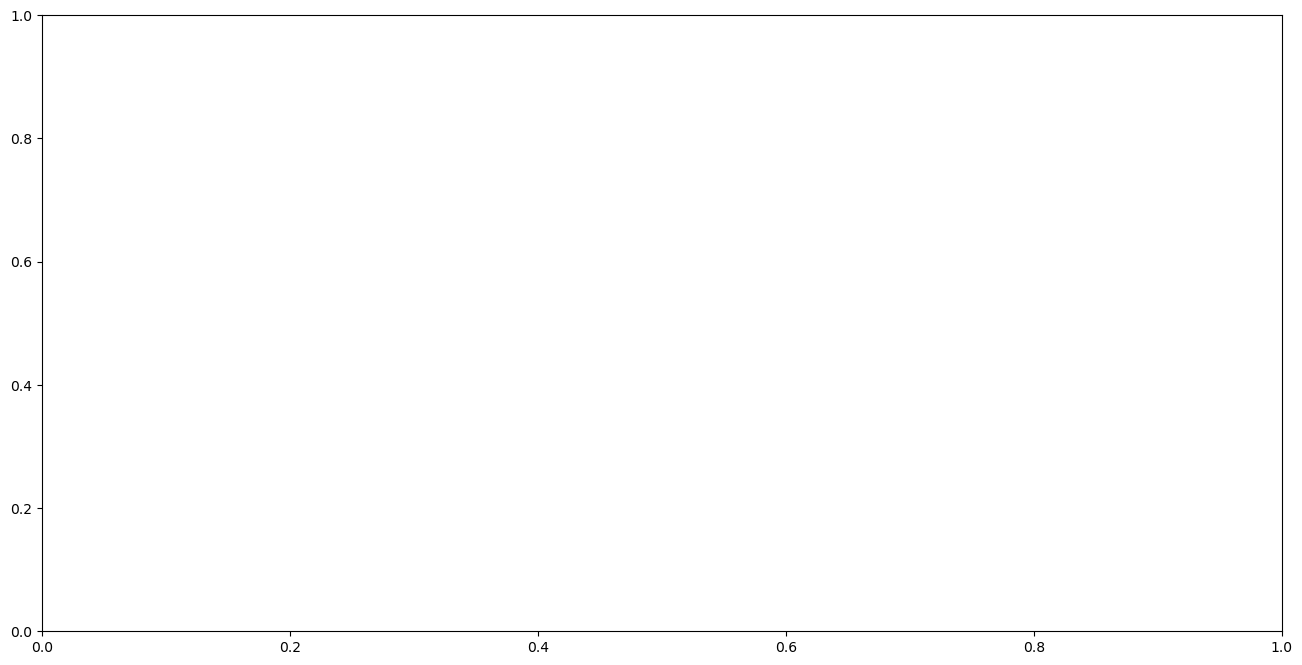

In [30]:
#Insolation Flux vs Radius
%matplotlib inline

figure, axes = plt.subplots(1,1,figsize=(16,8))

obliquity_data = pd.read_csv("mod_obliquity_measurements.csv")
txt_file = pd.read_csv('obliquity_ascii.txt',delimiter='\t')
# print(txt_file)
teff = (txt_file['T_eff']).astype(str).str[:4]
teff = teff.astype(float)
st_rad = (txt_file['R'].astype(str).str[:4]).astype(float)
pl_rad = obliquity_data['r'].astype(float)
λ = obliquity_data['lambda']
a_R = obliquity_data['a/R'].astype(float)
λ = λ.astype(float)
pl_mass = obliquity_data['m']

def Kepler3(st_rad,a_R):
    return ((7.495*10**(6))*(a_R*(st_rad*696000)/ (1.495979e+8))**3)**(1/2)
mask0 = (λ<10) & (teff>7500)
# obliquity_data = obliquity_data[mask]
# txt_file = txt_file[mask]
mask = (λ>10) & (teff<6000)
mask1 = (λ>5) & (teff<5500)

# fix this stuff up with the same filtering as above
λ = λ[~mask0]
teff = teff[~mask0]
pl_rad = pl_rad[~mask0]
st_rad = st_rad[~mask0]
pl_mass = pl_mass[~mask0]
a_R = a_R[~mask0]
λ = λ[~mask]
pl_rad = pl_rad[~mask]
st_rad = st_rad[~mask]
teff = teff[~mask]
pl_mass = pl_mass[~mask]
a_R = a_R[~mask]
λ_new = λ[~mask1]
teff_new = teff[~mask1]
a_R_new = a_R[~mask1]
pl_mass_new = pl_mass[~mask1]
pl_rad_new = pl_rad[~mask1]
st_rad_new = st_rad[~mask1]

# period = Kepler3(st_rad_new, a_R_new)
# print(period)
HJ = (a_R_new < 10)
print(HJ)
print(teff_new[HJ])
WJ = (a_R_new > 10) 
fontsize = 20
ax = axes

# colors = plt.get_cmap('plasma')(np.linspace(0, 1, 256))
# new_colors = np.vstack((colors[:200], colors[230:]))  # Remove colors between indices that map to [3.2, 6.0]
# new_cmap = ListedColormap(new_colors)
# cmap = new_cmap
# bounds = [0.01, 0.5, 1, 1.5, 2, 3.2, 6]
# norm = BoundaryNorm(bounds, ncolors=cmap.N, clip=True)

scatter = ax.scatter(teff_new[HJ],λ_new[HJ], marker='^',label='Hot Jupiters')
scatter = ax.scatter(teff_new[WJ],λ_new[WJ], marker='*', label='Warm Jupiters')
# scatter = ax.scatter(teff_new[1:],λ_new, c=pl_rad_new, cmap=cmap, s=100, norm=norm, edgecolor='k')
# ax.scatter(KOI6194b[5],KOI6194b[6],c=KOI_rad,cmap=scatter.cmap,norm=scatter.norm,marker='*',
#                     edgecolor='k',s=500,label='KOI-6194b')
# ax.axvline(6100,c='grey',linestyle='--',linewidth=3.0, label='Kraft Break')
ax.legend(fontsize=18)
ax.set_xlabel('Solar Effective Temperature (K)',fontsize=fontsize)
ax.set_ylabel(r'Projected Obliquity (deg)',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlim(10000,2000)


figure.subplots_adjust(top=0.9,right=0.85)  # Make space on the right for the colorbar
cbar = figure.colorbar(sc2,ax=ax,extend='max')
cbar.set_ticks(bounds)
cbar.set_label(r'Host Radii $(R_{\odot})$',fontsize=fontsize)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
_ = plt.legend()
# plt.savefig('Alignment_plots.png',dpi=100,bbox_inches='tight')